<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hassan-ademola/Hamoye_capstone_project_smote/blob/main/Deep%20learning/efficientnetb7_0.998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [1]:
# necessary imports
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
# define file paths
! git clone https://github.com/hassan-ademola/Hamoye_capstone_project_smote.git
train_path = 'Hamoye_capstone_project_smote/Data/train/'
val_path = 'Hamoye_capstone_project_smote/Data/val/'
test_path = 'Hamoye_capstone_project_smote/Data/test/'

Cloning into 'Hamoye_capstone_project_smote'...
remote: Enumerating objects: 10813, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 10813 (delta 13), reused 34 (delta 7), pack-reused 10768
Receiving objects: 100% (10813/10813), 360.43 MiB | 26.94 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Updating files: 100% (10812/10812), done.


In [3]:
# generate train and test sets from directories
train_ds = image_dataset_from_directory(train_path,label_mode='categorical',
                                        image_size=(256, 256))
val_ds = image_dataset_from_directory(val_path,label_mode='categorical',
                                      image_size=(256, 256))
test_ds = image_dataset_from_directory(test_path,label_mode='categorical',
                                       shuffle=False,image_size=(256, 256))

Found 7556 files belonging to 4 classes.


2022-03-30 09:08:51.592450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 09:08:51.744450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 09:08:51.745680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-30 09:08:51.750486: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 2160 files belonging to 4 classes.
Found 1084 files belonging to 4 classes.


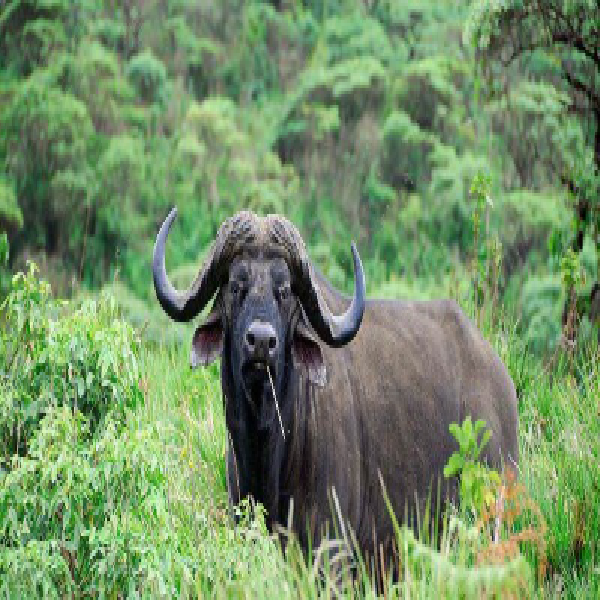

In [4]:
# load a sample image
from tensorflow.keras.preprocessing import image

img_path = train_path+'Buffalo/Buffalo_1.jpg'
img = image.load_img(img_path, target_size=(600, 600))
img

In [5]:
# make prediction with a pretrained model
from keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.applications.efficientnet import decode_predictions

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

base_model = EfficientNetB7(weights='imagenet')
pred = base_model.predict(x)
print('Predicted:', decode_predictions(pred))

268337152/268326632 [==============================] - 7s 0us/step


2022-03-30 09:09:10.610221: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-30 09:09:16.590299: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


49152/35363 [=========================================] - 0s 0us/step
Predicted: [[('n02408429', 'water_buffalo', 0.7794233), ('n02403003', 'ox', 0.018190512), ('n03868242', 'oxcart', 0.0038363677), ('n02410509', 'bison', 0.0036628162), ('n02504013', 'Indian_elephant', 0.0015662572)]]


In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = EfficientNetB7(weights='imagenet', include_top=False,
                            input_shape=(256,256,3))

# freeze extraction layers
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

258088960/258076736 [==============================] - 2s 0us/step


In [7]:
# create callback to use during training
checkpoint = tf.keras.callbacks.ModelCheckpoint('weights.h5',save_best_only=True,
                                                    save_weights_only=True)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# train the model on the new data for a few epochs
history = model.fit(train_ds,epochs=20,validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/20
237/237 [==============================] - 116s 397ms/step - loss: 0.1349 - accuracy: 0.9722 - val_loss: 0.0346 - val_accuracy: 0.9917
Epoch 2/20
237/237 [==============================] - 88s 372ms/step - loss: 0.0335 - accuracy: 0.9927 - val_loss: 0.0237 - val_accuracy: 0.9935
Epoch 3/20
237/237 [==============================] - 88s 371ms/step - loss: 0.0240 - accuracy: 0.9947 - val_loss: 0.0196 - val_accuracy: 0.9935
Epoch 4/20
237/237 [==============================] - 89s 373ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.0184 - val_accuracy: 0.9940
Epoch 5/20
237/237 [==============================] - 90s 380ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 6/20
237/237 [==============================] - 89s 376ms/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 0.0158 - val_accuracy: 0.9949
Epoch 7/20
237/237 [==============================] - 89s 376ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0154 - val_a

In [8]:
# save results
results = history.history

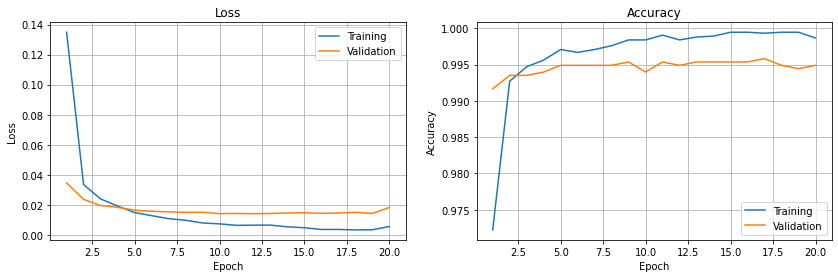

In [9]:
# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

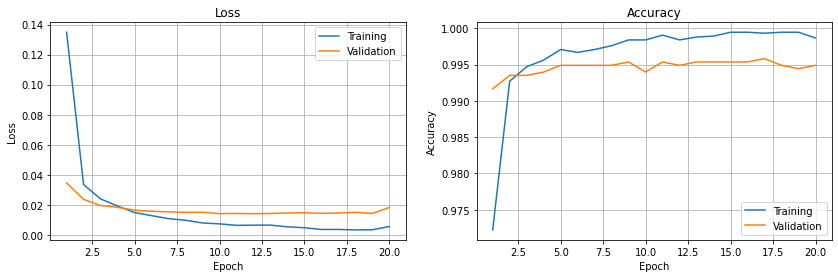

In [11]:
# plot results
import matplotlib.pyplot as plt
n_epochs = len(results['loss'])

plt.figure(figsize=[14,4])
plt.grid(True)
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), results['loss'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), results['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), results['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
model.load_weights('weights.h5')

In [11]:
predictions = model.evaluate(test_ds)

34/34 [==============================] - 10s 298ms/step - loss: 0.0097 - accuracy: 0.9982


In [12]:
# make predictions on the unseen data
predictions = model.predict(test_ds)
predictions

array([[9.9968994e-01, 3.7173264e-05, 2.6733679e-04, 5.5699652e-06],
       [9.9999118e-01, 4.2120269e-06, 3.6984272e-06, 9.6759993e-07],
       [9.9923241e-01, 1.2150465e-05, 7.5070682e-04, 4.6845248e-06],
       ...,
       [3.6869683e-06, 2.7735020e-06, 2.2564848e-06, 9.9999130e-01],
       [3.0805891e-06, 5.6915678e-06, 7.4732311e-06, 9.9998367e-01],
       [6.5399297e-05, 2.4708439e-05, 5.0393651e-06, 9.9990487e-01]],
      dtype=float32)

In [13]:
# save the index of the highest probability
predictions = predictions.argmax(axis=1)
predictions

array([0, 0, 0, ..., 3, 3, 3])

In [14]:
# get the actual values
test_images = list(test_ds.unbatch().as_numpy_iterator())
y_true = np.array([i[1] for i in test_images])
y_true = y_true.argmax(axis=1)
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
# calculate f1_score
from sklearn.metrics import f1_score
f1_score(y_true,predictions,average='macro')

0.9981532637609986

In [16]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,predictions)

array([[271,   0,   0,   0],
       [  0, 271,   0,   0],
       [  1,   1, 269,   0],
       [  0,   0,   0, 271]])

The model misclassified **rhinos**. Let's see

In [17]:
import pandas as pd
comparison = pd.DataFrame({'actual':y_true,'predicted':predictions,
                           'same':y_true==predictions})
comparison.replace({0:'Buffalo',1:'Elephant',2:'Rhino',3:'Zebra'},inplace=True)
comparison[comparison.same==False]

,actual,predicted,same
584,Rhino,Elephant,False
633,Rhino,Buffalo,False


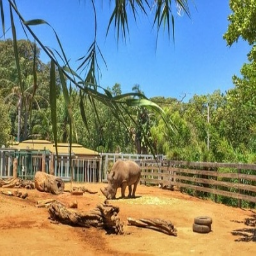

In [18]:
image.array_to_img(test_images[584][0])

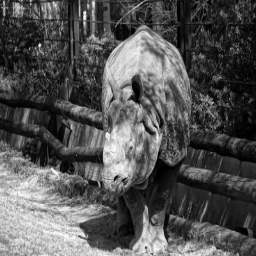

In [19]:
image.array_to_img(test_images[633][0])

In [ ]:
# uncomment the below to save the model
'''import pickle
pickle.dump(model, open('efficientnetb7.pkl', 'wb'))'''